In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns #簡易版matplotlib
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('./data/2021_car_rent.csv')

In [3]:
df.shape

(312990, 25)

In [4]:
df.head(1)

,S120910825,毛俊傑,1967-07-30 00:00:00.000,0937277635,台北市松山區,Y,email,1,0,1.1,...,1765,4673,1170,0.1,0.2,0.3,193,16,27.1,0.4
0,S120917477,游宥勝,1970-08-08 00:00:00.000,0937306289,高雄市岡山區,Y,email,1,1,1,...,364,2054.0,120,0,0,0,0,14,14,0


In [5]:
#無表頭所以加表頭
df_col = df.columns.to_list() #把目前表頭抓出來，這是一筆個資
df.columns=['ID','NAME','BIRTH','TEL','ADDRESS','MESSAGE','INVOICE','CHECKMOBILE','VALIDEMAIL'
            ,'AUDIT','APPLYDATE','2021_FIRST_RENT','2021_LAST_RENT','RENT_TIMES','AMOUNT','KM'
            ,'DRIVETIME','GIFT_CAR','GIFT_MOTOR','SAFE','SAFE_TIMES','ETAG','Q3Q4_RENT_TIMES'
            ,'STATIONCAR','ROADCAR']
#表頭資料轉存dict再轉dataframe再concat
dict_t = {}
for i in range(len(df_col)):
    dict_t[df.columns[i]]=df_col[i]
    
df_temp = pd.DataFrame(dict_t,index=[0]) #不設定index=[0]會錯，除非dict的值是list而非單一數字
df = pd.concat([df,df_temp])
df.reset_index(inplace=True, drop=True)

In [6]:
# df.info()

In [7]:
df[df['BIRTH'].isna()==True].index

Int64Index([20002, 165915, 276503], dtype='int64')

In [8]:
df = df.drop(index=df[df['BIRTH'].isna()==True].index)
df = df.drop(index=df[df['DRIVETIME'].isna()==True].index)

In [9]:
# df.info()

In [10]:
#重制index
df.reset_index(inplace=True, drop=True)

In [11]:
#新增年齡
df['age']=[time.localtime().tm_year-int(df['BIRTH'][i][:4]) for i in range(len(df))]

In [12]:
#生日只抓月份
df['BIRTH'] = [df['BIRTH'][i][5:7] for i in range(len(df))]

In [13]:
# df.head()

In [14]:
df.columns.to_list()

['ID',
 'NAME',
 'BIRTH',
 'TEL',
 'ADDRESS',
 'MESSAGE',
 'INVOICE',
 'CHECKMOBILE',
 'VALIDEMAIL',
 'AUDIT',
 'APPLYDATE',
 '2021_FIRST_RENT',
 '2021_LAST_RENT',
 'RENT_TIMES',
 'AMOUNT',
 'KM',
 'DRIVETIME',
 'GIFT_CAR',
 'GIFT_MOTOR',
 'SAFE',
 'SAFE_TIMES',
 'ETAG',
 'Q3Q4_RENT_TIMES',
 'STATIONCAR',
 'ROADCAR',
 'age']

#### 看看欄位排序，以便設計標籤

In [15]:
df.sort_values(by=['age'],ascending=False)[['age','ID','NAME']].head()#大到小排序

,age,ID,NAME
196960,138,A226097720,張方杰
291819,137,Q123509171,徐藝蒼
278779,133,N125276164,柯坤呈
156667,122,A130147428,徐男育
95259,122,I100224361,王俊皓


In [16]:
#先轉成數字，不然會有錯
df['ETAG'] = [int(df['ETAG'][i]) for i in range(len(df))]
df.sort_values(by=['ETAG'],ascending=False)[['ETAG','ID','NAME']].head()
df['SAFE'] = [float(df['SAFE'][i]) for i in range(len(df))]
df.sort_values(by=['SAFE'],ascending=False)[['SAFE','ID','NAME']].head()

df['DRIVETIME'] = [int(df['DRIVETIME'][i]) for i in range(len(df))]
df.sort_values(by=['DRIVETIME'],ascending=False)[['DRIVETIME','ID','NAME']].head()
df['KM'] = [int(df['KM'][i]) for i in range(len(df))]
df.sort_values(by=['KM'],ascending=False)[['KM','ID','NAME']].head()
df['ETAG'] = [int(df['ETAG'][i]) for i in range(len(df))]
df.sort_values(by=['ETAG'],ascending=False)[['ETAG','ID','NAME']].head()
df['RENT_TIMES'] = [int(df['RENT_TIMES'][i]) for i in range(len(df))]
df.sort_values(by=['RENT_TIMES'],ascending=False)[['RENT_TIMES','ID','NAME']].head()
df['age'] = [int(df['age'][i]) for i in range(len(df))]
df.sort_values(by=['age'],ascending=False)[['age','ID','NAME']].head()
df['AMOUNT'] = [int(df['AMOUNT'][i]) for i in range(len(df))]
df.sort_values(by=['AMOUNT'],ascending=False)[['AMOUNT','ID','NAME']].head()

,AMOUNT,ID,NAME
195046,471484,A224504437,施穎芳
41439,364008,B122303468,陳琮翔
175753,324446,A220064941,劉曼怡
147142,310618,A129697079,林鼓恩
36415,280387,F123479214,黃川原


#### 新增標籤欄位

In [32]:
df['Tag_Amount']=['high' if df['AMOUNT'][i]>10000 else 'low' for i in range(len(df))]
df['Tag_age']=['old' if df['age'][i]>40 else 'normal' if 24<df['age'][i]<41 else 'young' if 17<df['age'][i]<25 else 'not_people' for i in range(len(df))]
df['Tag_RENT_TIMES']=['high' if df['RENT_TIMES'][i]>100 else 'normal' if 101>df['RENT_TIMES'][i]>50 else 'low' for i in range(len(df))]
df['Tag_KM']=['high' if df['KM'][i]>5000 else 'normal' if 5001>df['KM'][i]>500 else 'low' for i in range(len(df))]
df['Tag_DRIVETIME']=['high' if df['DRIVETIME'][i]>5000 else 'normal' if 5001>df['DRIVETIME'][i]>500 else 'low' for i in range(len(df))]
df['Tag_ETAG']=['high' if df['ETAG'][i]>5000 else 'normal' if 5001>df['ETAG'][i]>100 else 'low' for i in range(len(df))]
df['Tag_SAFE']=['high' if df['SAFE'][i]>5000 else 'normal' if 5001>df['SAFE'][i]>1000 else 'low' for i in range(len(df))]

In [ ]:
# df[df['Tag_Amount']=='high'].info()

In [33]:
df['city']=[str(df['ADDRESS'][i])[:3] for i in range(len(df))]

In [ ]:
# df.head()

<AxesSubplot:xlabel='Tag_Amount', ylabel='count'>

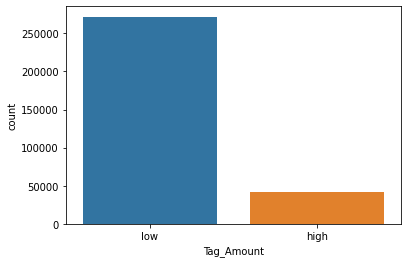

In [34]:
sns.countplot(df['Tag_Amount'])

In [35]:
plt.rcParams[u'font.sans-serif'] = ['simhei'] # 步驟一（替換sans-serif字型）
plt.rcParams['axes.unicode_minus'] = False  # 步驟二（解決座標軸負數的負號顯示問題）
# 解析度引數-dpi，畫布大小引數-figsize
plt.figure(dpi=300,figsize=(80,16))
# 改變文字大小引數-fontsize
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('',fontsize=60) 
plt.ylabel('',fontsize=30)
sns.countplot(df[u'city'],hue=df['Tag_Amount'])

<AxesSubplot:xlabel='city', ylabel='count'>

In [36]:
plt.rcParams[u'font.sans-serif'] = ['simhei'] # 步驟一（替換sans-serif字型）
plt.rcParams['axes.unicode_minus'] = False  # 步驟二（解決座標軸負數的負號顯示問題）
# 解析度引數-dpi，畫布大小引數-figsize
plt.figure(dpi=300,figsize=(80,16))
# 改變文字大小引數-fontsize
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('',fontsize=60) 
plt.ylabel('',fontsize=30)
sns.countplot(df[u'Tag_age'],hue=df['Tag_Amount'])

<AxesSubplot:xlabel='Tag_age', ylabel='count'>

In [37]:
plt.rcParams[u'font.sans-serif'] = ['simhei'] # 步驟一（替換sans-serif字型）
plt.rcParams['axes.unicode_minus'] = False  # 步驟二（解決座標軸負數的負號顯示問題）
# 解析度引數-dpi，畫布大小引數-figsize
plt.figure(dpi=300,figsize=(80,16))
# 改變文字大小引數-fontsize
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('',fontsize=60) 
plt.ylabel('',fontsize=30)
sns.countplot(df[u'Tag_ETAG'],hue=df['Tag_Amount'])

<AxesSubplot:xlabel='Tag_ETAG', ylabel='count'>

In [38]:
plt.rcParams[u'font.sans-serif'] = ['simhei'] # 步驟一（替換sans-serif字型）
plt.rcParams['axes.unicode_minus'] = False  # 步驟二（解決座標軸負數的負號顯示問題）
# 解析度引數-dpi，畫布大小引數-figsize
plt.figure(dpi=300,figsize=(80,16))
# 改變文字大小引數-fontsize
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('',fontsize=60) 
plt.ylabel('',fontsize=30)
sns.countplot(df[u'Tag_RENT_TIMES'],hue=df['Tag_Amount'])

<AxesSubplot:xlabel='Tag_RENT_TIMES', ylabel='count'>

In [41]:
plt.rcParams[u'font.sans-serif'] = ['simhei'] # 步驟一（替換sans-serif字型）
plt.rcParams['axes.unicode_minus'] = False  # 步驟二（解決座標軸負數的負號顯示問題）
# 解析度引數-dpi，畫布大小引數-figsize
plt.figure(dpi=300,figsize=(80,16))
# 改變文字大小引數-fontsize
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.xlabel('',fontsize=60) 
plt.ylabel('$',fontsize=60)
sns.countplot(df[u'Tag_SAFE'],hue=df['Tag_Amount'])

<AxesSubplot:xlabel='Tag_SAFE', ylabel='count'>